In [1]:
# Initialize imports
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root = Path().absolute()

# ETS Challenge 2019

## Setup Data
As the train set is already provided and 20% of the original data is considered a good value for the Cross Validation set, I randomly splitted both training sets separately in 80% for training the model and 20% for the validation.


In [2]:
raw1_filename = f'{root}/data/raw/train1.csv'
raw2_filename = f'{root}/data/raw/train2.csv'
raw1 = pd.read_csv(raw1_filename)
raw2 = pd.read_csv(raw2_filename)
train1 = raw1.sample(frac=0.8)
train2 = raw2.sample(frac=0.8)

## First Approach to the set
Let’s plot the train data to see if we can see some relations at first sight.


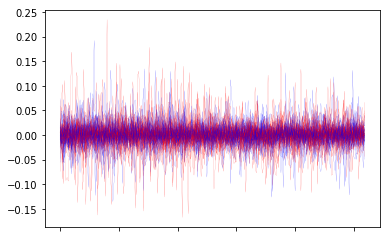

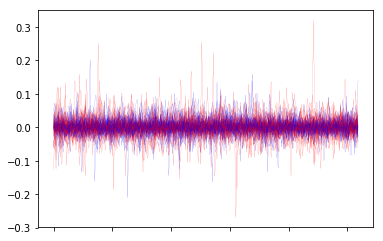

In [3]:
for train in [train1, train2]:
    subset = train.sample(frac=0.01)
    series = subset.iloc[:,:-1].transpose()
    classes = subset.iloc[:,-1:]
    colors = np.empty_like(classes, dtype=str)
    colors[classes == 1] = 'b'
    colors[classes == 0] = 'r'
    series.plot(legend=False, color = colors.transpose()[0], lw = 0.1)
    plt.show()

If we face a subset of real series (blue) against generated ones (red), we cannot significantly perceive any relation between them (apart from maybe some subtle differences in the volatility). As financial time series tend to be, in some degree, correlated due to the market impact, we can try to plot de covariance matrix of the sets.

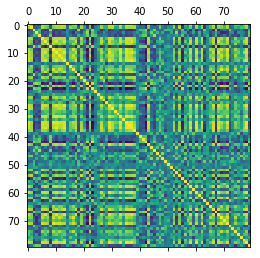

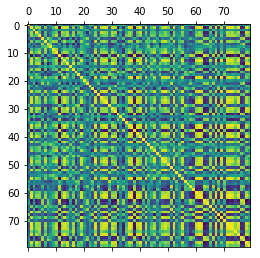

In [17]:
for train in [train1, train2]:
    subset = train.sample(frac=0.01)
    returns = subset.iloc[:,:-1].transpose()
    prices = (1 + returns).cumprod() - 1
    corr = prices.corr()
    plt.matshow(corr)
    plt.show()